**ПРОЕКТ. ИССЛЕДОВАНИЕ ДЛЯ ИНТЕРНЕТ-МАГАЗИНА КОМПЬЮТЕРНЫХ ИГР "СТРИМЧИК"**

**Цель данного проекта** - определить критерии успешности компьютерных игр на 2017 год на основе данных до 2016г.
Результаты проведенной работы должны помочь интернет-магазину определить потенциально популярный продукт и запланировать рекламные компании на следующий год.

**Задачи исследования**
1. Изучить состав и структуру данных в полученной таблице.
2. Обработать данные: заполнить пропуски, выявить и убрать дубликаты и пр.
3. Провести исследовательский анализ данных, в т.ч. определить актуальный период данных для дальнейшего анализа. 
4. Составить портрет пользователя для каждого региона.
5. Сформулировать и проверить гипотезы.

**Исходные данные**

Нами получены данные по продаже компьютерных игр до 2016 года в файле в формате csv. 
Исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах получены из открытых источников.  

______
**ОГЛАВЛЕНИЕ**<a id='content'></a>

[1. Обработка данных](#1-bullet)

[2. Исследовательский анализ данных](#2-bullet)

[3. Составление Портрета пользователя для каждого региона](#3-bullet)

[4. Проверка гипотез](#4-bullet)

[5. Общие выводы](#5-bullet)

**ОБРАБОТКА ДАННЫХ**<a id='1-bullet'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
print(data.head(5))

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- При анализе таблицы можно выявить пропуски данных в таблице genre. Так как их всего 2 из 16715, то их лучше удалить - их отсутствие никак не повлияет на исследование.
- В столбце с Годом релиза удалим пропуски и изменим тип данных на int. 
- Столбец с оценкой пользователей типа object - заменим тип данных на float.
- В столбце с рейтингом заменим пропуски на значение "неизвестно". 
- Проверим столбцы на наличие дубликатов
- Добавим столбец с общей суммой продаж во всех регионах

In [4]:
data.columns = data.columns.str.lower()
data = data.dropna(subset=['genre']).reset_index()

In [5]:
print(data['name'].unique())
print()
print(data['platform'].unique())
print()
print(data['genre'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [6]:
print(data['rating'].unique())
data['rating'] = data['rating'].fillna('неизвестно')

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [7]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [8]:
data['user_score'] = data['user_score'].replace('tbd',np.NaN)

data['user_score'] = data['user_score'].astype(float)

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
display(data[data.duplicated(subset=['name', 'platform'])])

       index                         name platform  year_of_release     genre  \
1590    1591  Need for Speed: Most Wanted     X360             2005    Racing   
4126    4127           Sonic the Hedgehog      PS3                0  Platform   
11714  11715  Need for Speed: Most Wanted       PC             2012    Racing   
16228  16230                Madden NFL 13      PS3             2012    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1590        1.0      0.13      0.02         0.10          83.0         8.5   
4126        0.0      0.48      0.00         0.00          43.0         4.1   
11714       0.0      0.06      0.00         0.02          82.0         8.5   
16228       0.0      0.01      0.00         0.00          83.0         5.5   

      rating  
1590       T  
4126    E10+  
11714      T  
16228      E  


In [11]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  int64  
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       7590 non-null   float64
 11  rating           16713 non-null  object 
 12  total_sales      16713 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.7+ MB


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,неизвестно,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,неизвестно,31.38
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,неизвестно,30.26
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,неизвестно,28.31


**В рамках подготовки данных мы:**
1. Изучили таблицу: вывели 5 первых строк и общую информацию о датасете
2. Привели названия столбцов к нижнему регистру
3. В столбце genre удалили строки без данных, их всего 2 и они никак не повлияют на исследование. Вместе с ними ушли и пропуски в столбце name.  
4. Изменили тип данных в столбце с годом релиза на int. Для этого заменили пропуски на 0. Данная замена никак не повлияет на дальнейшее исследование, а значение 0 мы всегда с легкостью найдем и отсечем при дальнейшем исследовании. 
5. Оценили уникальные значения в столбце с оценкой пользователей. Были выявлены значения nan и tbd. TBD - означает, что оценка пользователей еще не установлена (to be determined). Поэтому будет логично убрать оба значения. Мы заменили tbd на nan и заменили тип данных на float.
6. Столбцы с оценкой критиков и оценкой пользователей не меняем: пропуски мы никак не заполним, а тип данных подходит для дальнейшей работы
7. В столбце с рейтингом отсутсвует примерно 40% значений. Данный рейтинг выдается  Мы заменили пропуски на значение "неизвестно". 
ESRB - американское рейтинговое агентство, появившееся в 1994 году. На выведенной таблице видно, что нет рейтинга у игр, выпущенных достаточно давно. Скорее всего рейтинги выставлялись по мере выпуска новых игр. Кроме того, игры на платформы не американского происхождения начали получать рейтинги в более поздние года и скорее всего вообще не получали, если не продавались в америке либо продавались в небольших объемах. 
8. Провели анализ на наличие дубликатов в столбцах Genre, Platform, Raiting. Дубликатов не выявлено.
9. В ходе анализа дубликатов мы выявили игры с одним названием, но рассчитанные на разные платформы. От таких дубликатов не стоит избавляться - так как это все же разные данные относительно платформ.
10. Добавили столбец с общей суммой продаж во всех регионах. 

[*к оглавлению*](#content)

**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**<a id='2-bullet'></a>

In [12]:
print(data.query('year_of_release < 1995')['year_of_release'].count())

755


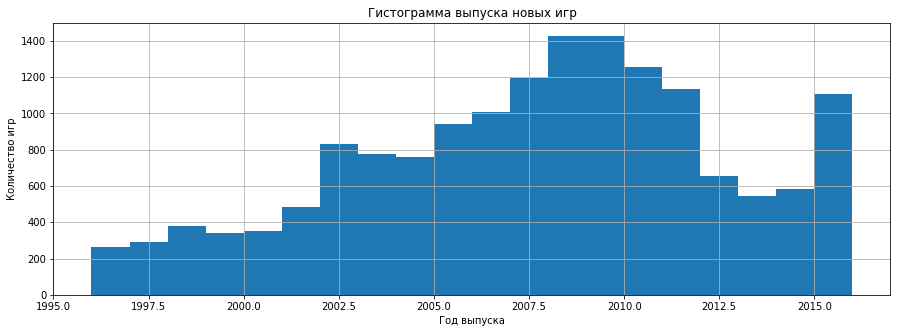

In [13]:
data.query('year_of_release > 1995').hist('year_of_release', bins=20, figsize=[15, 5])
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Гистограмма выпуска новых игр')

plt.show()

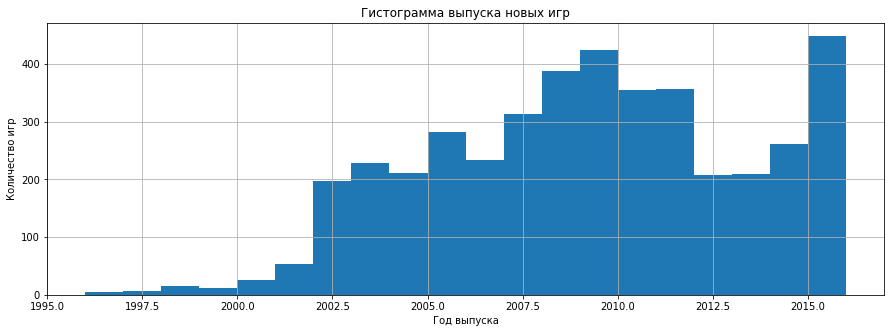

In [14]:
data[data.duplicated(subset=['year_of_release', 'name'])].query(
    'year_of_release > 1995').hist('year_of_release', bins=20, figsize=[15, 5])
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Гистограмма выпуска новых игр')

plt.show()

Мы изучили сколько игр выпускалось в разные годы. До 1995 года было незначительное число выпусков - всего 755 за 15 лет (4,5% от всех игр за 36 лет). Поэтому мы исключили период до 1995 года для большей наглядности последующих лет на графике.

Мы построили 2 графика: на первом учтены все выпуски игр, в т.ч. перевыпуски игр на разных платформах. На втором - выпуски исключительно новых игр на рынке.

На первом графике пик выпусков игр пришелся на 2006 - 2011 гг, а также 2015 год - выпускалось больше 1000 игр в год. 

При этом пик выпусков абсолютно новых игр был в период 2007-2011 гг. (больше 300 игр в год), а после непродолжительного спада в период 2012-2014гг - новый всплеск выпуска новых игр в 2015гг.

In [55]:
tmp = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
tmp.index[:6].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

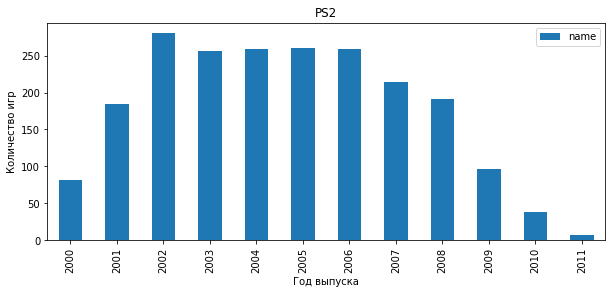

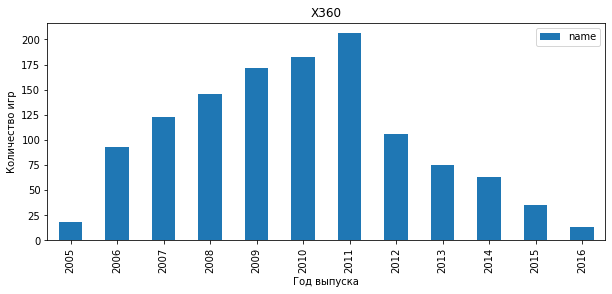

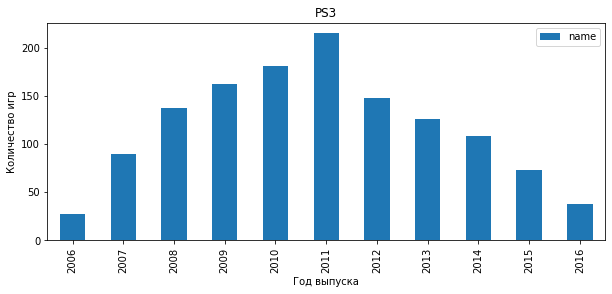

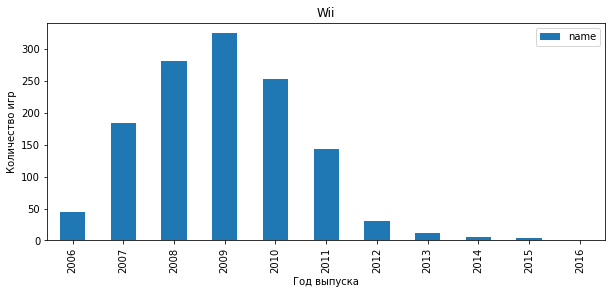

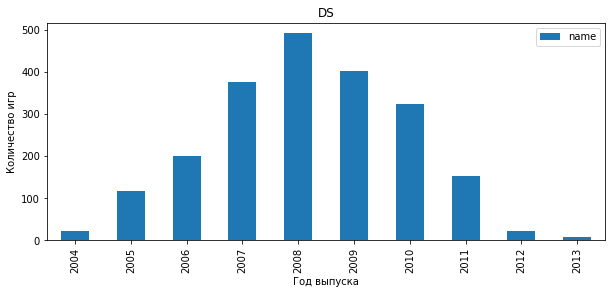

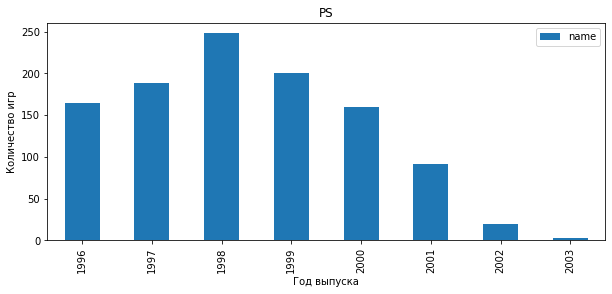

In [57]:
platform = tmp.index[:6]
for i in platform:
    data_platform = data[(data['platform'] == i) & (data['year_of_release'] > 1995)].groupby('year_of_release').agg({'name':'count'}).reset_index()
    data_platform.plot(kind='bar', x='year_of_release', y='name', figsize=[10, 4])
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество игр')
    plt.title(i)


Посмотрели, как менялись продажи по платформам. Мы взяли период времени с 1995 по 2016, т.к. до 1995 года выпускалось очень мало игр.

Мы выбрали топ-6 платформ и построили распределение по годам. 
Платформы из серии PS теряют свою актуальность по мере появления новой версии. PS2 уже на 3-й год существования вышел на свое топовое значение > 250 /год и медленно терял свою популярность после выхода PS3.

В целом на основе топ-6 платформ по объемам продаж можно сделать вывод, что платформы набирают популярность среди производителей игр до своих лучших значение в течение первых 3-х лет.

Пик популярности - около 1 года, после которого идет падение популярности (а значит и количество игр выпускаемых на этих платформах). При этом по более старым платформам количество игр стремится к 0 (примерно через 4 года после пика на этих платформах уже практически не выпускают новые игры).  

In [17]:
new_data = data.query('year_of_release >= 2013')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2233 non-null   int64  
 1   name             2233 non-null   object 
 2   platform         2233 non-null   object 
 3   year_of_release  2233 non-null   int64  
 4   genre            2233 non-null   object 
 5   na_sales         2233 non-null   float64
 6   eu_sales         2233 non-null   float64
 7   jp_sales         2233 non-null   float64
 8   other_sales      2233 non-null   float64
 9   critic_score     991 non-null    float64
 10  user_score       1192 non-null   float64
 11  rating           2233 non-null   object 
 12  total_sales      2233 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 244.2+ KB


Так как средний период роста и пика платформ примерно 4 года - изучим популярные платформы за последние 4 года, а именно с 2013 по 2016 годы.

In [58]:
display(new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False))

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


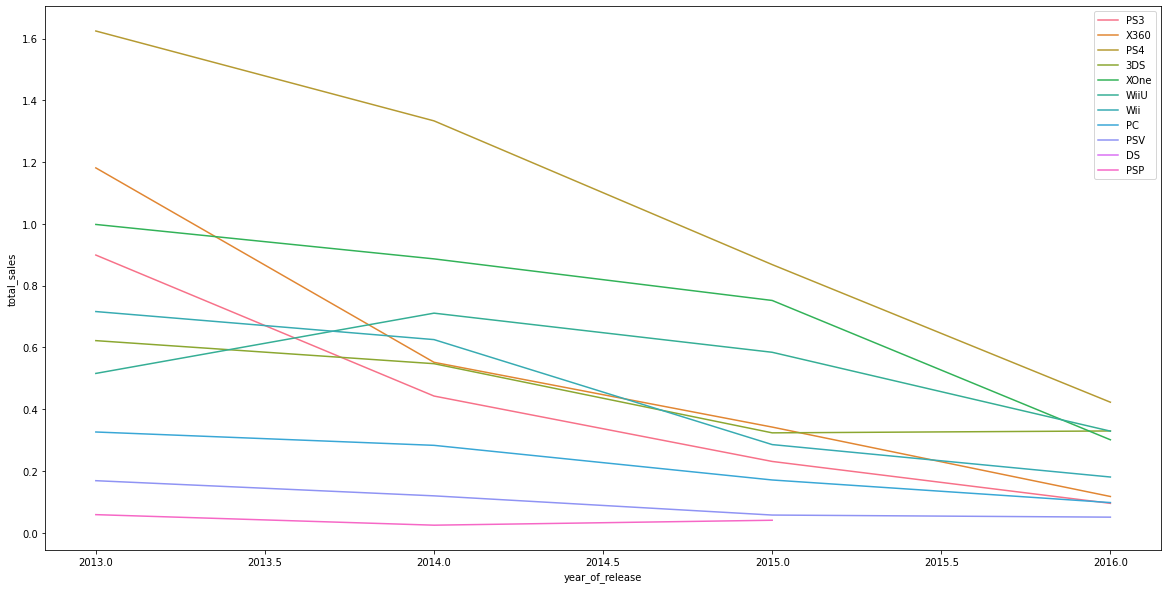

In [85]:
plt.figure(figsize=[20, 10])
ax = sns.lineplot(data = new_data, x='year_of_release', y='total_sales', hue='platform', ci=None)
plt.legend(loc='upper right')

Судя по графику объем продаж по большей части платформ падает. Исключение составляет X360, которая начала расти в 2015 году.
Исходя из сводной таблицы топ-5 платформ по объему продаж за последние 4 года: PS4, PS3, XOne, 3DS и X360.

Text(0, 0.5, 'Общая сумма продаж')

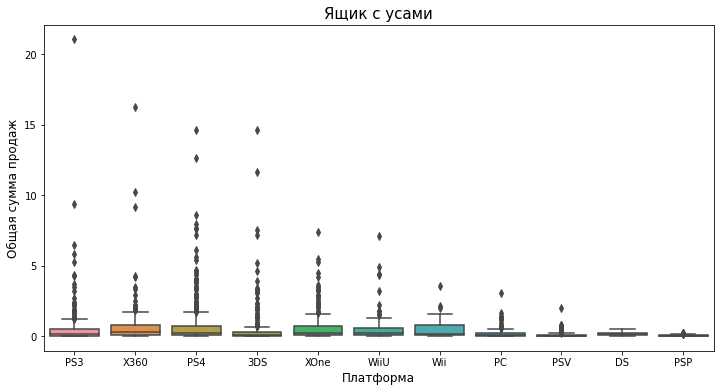

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_data, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общая сумма продаж',fontsize=12)

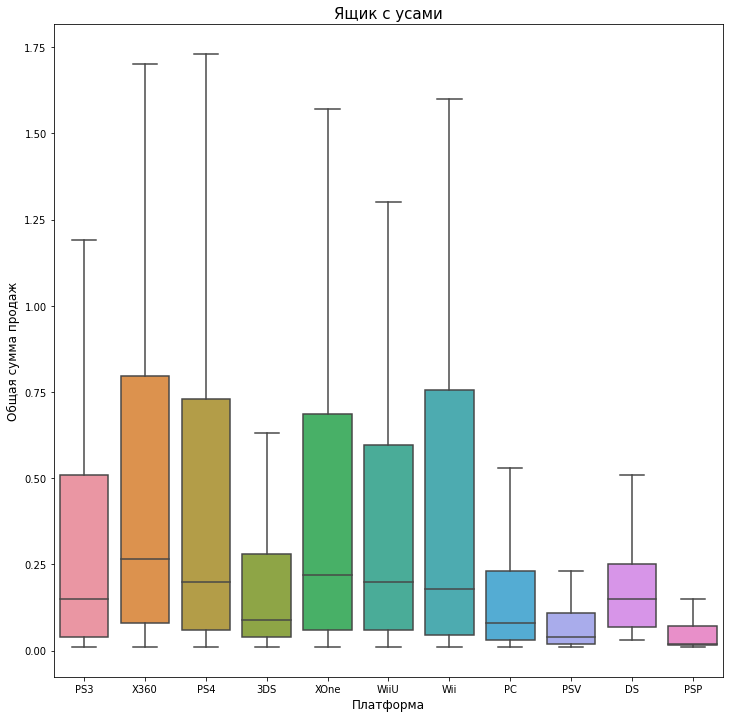

In [79]:
plt.figure(figsize=(12,12))
sns.boxplot(data=new_data, x='platform', y='total_sales', showfliers=False)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общая сумма продаж',fontsize=12)
plt.ylim=(0, 0.9)

Мы построили ящик с усами для анализа общей суммы продаж в разбивке по платформам.
На первом графике видны выбросы, из-за которых тяжело оценить сами "ящики" и их "усы".
При этом можно отметить, что платформы PS3, x360, PS4 и 3DS имеют самые большие выбросы по продажам,
т.е. на этих платформах есть "звезды" - игры с рекордной суммой глобальных продаж.
На аналогичном графике "без выбросов" можем отметить, что самый высокий показатель медианной суммы продаж у игр на платформе X360, достаточно высокий медианный показатель так же у платформ: XOne, PS4 и WiiU.
Самые низкие - у PSP, PSV, PC и 3DS.

Корреляция между оценкой критикой и объемом продаж = 0.40656790206178095
Корреляция между оценкой пользователей и объемом продаж = -0.031957110204556376


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

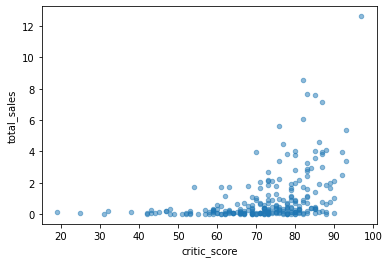

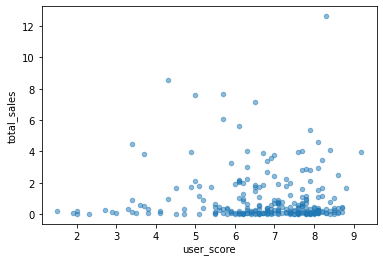

In [22]:
PS4_data = new_data.query('platform=="PS4"')
print('Корреляция между оценкой критикой и объемом продаж =', PS4_data['critic_score'].corr(PS4_data['total_sales']))
PS4_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
print('Корреляция между оценкой пользователей и объемом продаж =', PS4_data['user_score'].corr(PS4_data['total_sales']))
PS4_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

Мы посмотрели, как влияют на продажи игр внутри PS4 (как самой крупной по объему продаж) отзывы пользователей и критиков. Для этого были построены диаграммы рассеивания и посчитана корреляция. 
Взаимосвязь между оценками критиков и пользователей и объемом продаж отсутствует.

Корреляция между оценкой критикой и объемом продаж = 0.3342853393371919
Корреляция между оценкой пользователей и объемом продаж = 0.0023944027357566925


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

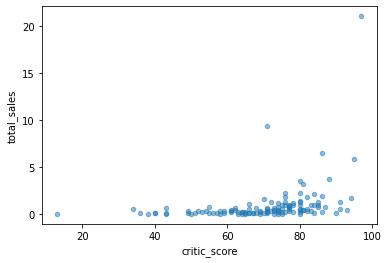

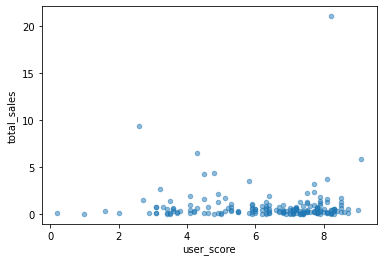

In [23]:
PS3_data = new_data.query('platform=="PS3"')
print('Корреляция между оценкой критикой и объемом продаж =', PS3_data['critic_score'].corr(PS3_data['total_sales']))
PS3_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
print('Корреляция между оценкой пользователей и объемом продаж =', PS3_data['user_score'].corr(PS3_data['total_sales']))
PS3_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

Корреляция между оценкой критикой и объемом продаж = 0.4169983280084017
Корреляция между оценкой пользователей и объемом продаж = -0.06892505328279414


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

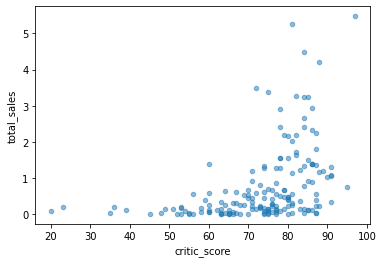

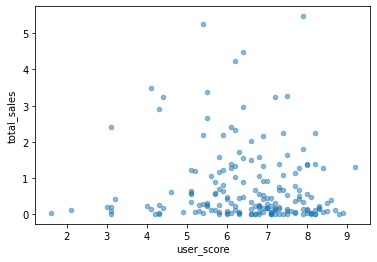

In [24]:
XOne_data = new_data.query('platform=="XOne"')
print('Корреляция между оценкой критикой и объемом продаж =', XOne_data['critic_score'].corr(XOne_data['total_sales']))
XOne_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
print('Корреляция между оценкой пользователей и объемом продаж =', XOne_data['user_score'].corr(XOne_data['total_sales']))
XOne_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

Корреляция между оценкой критикой и объемом продаж = 0.3570566142288103
Корреляция между оценкой пользователей и объемом продаж = 0.24150411773563016


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

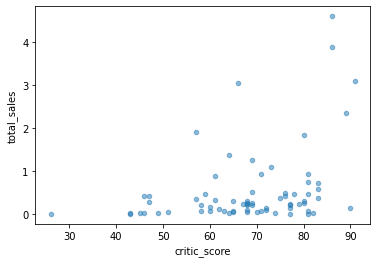

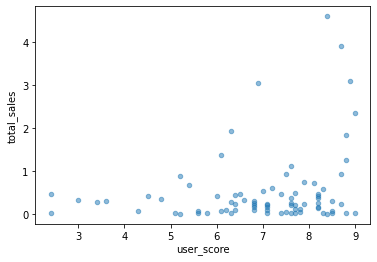

In [86]:
Platform_3DS_data = new_data.query('platform=="3DS"')
print('Корреляция между оценкой критикой и объемом продаж =', 
      Platform_3DS_data['critic_score'].corr(Platform_3DS_data['total_sales']))
Platform_3DS_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
print('Корреляция между оценкой пользователей и объемом продаж =', 
      Platform_3DS_data['user_score'].corr(Platform_3DS_data['total_sales']))
Platform_3DS_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

Мы также посчитали корреляцию и построили графики для платформ PS3, XOne и 3DS. По данным платформам также не найдена связь между объемам продаж и оценками как пользователей, так и критиков. 

In [90]:
genre_pivoted = new_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False)

display(genre_pivoted)

,total_sales,part
genre,,
Shooter,0.450,0.254958
Sports,0.240,0.135977
Platform,0.225,0.127479
Role-Playing,0.125,0.070822
Fighting,0.125,0.070822
Racing,0.120,0.067989
Action,0.110,0.062323
Simulation,0.100,0.056657
Misc,0.100,0.056657


Посмотрели на общее распределение игр по жанрам. Данные брали за последние 4 года (2013-2016гг).

Мы посчитали медианное значение общих продаж по каждому игровому жанру. 
Самыми прибыльными жанрами являются Шутер, Спортивные игры и Platform.
Игры этих жанров в среднем продаются производителями по 450, 240 и 220 тысяч копий.
При этом стратегии и паззлы и приключения оказались самыми неприбыльными жанрами

[*к оглавлению*](#content)

**СОСТАВЛЯЕМ ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА**<a id='3-bullet'></a>

In [27]:
eu_sales_total = new_data['eu_sales'].sum()
na_sales_total = new_data['na_sales'].sum()
jp_sales_total = new_data['jp_sales'].sum()
eu_platform_pivoted = new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platform_pivoted['sale_part'] = eu_platform_pivoted['eu_sales'] / eu_sales_total
display(eu_platform_pivoted)

eu_genre_pivoted = new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_genre_pivoted['sale_part'] = eu_genre_pivoted['eu_sales'] / eu_sales_total
display(eu_genre_pivoted)

,eu_sales,sale_part
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933
PC,25.36,0.064656
WiiU,19.85,0.050608
PSV,6.10,0.015552
Wii,5.93,0.015119


,eu_sales,sale_part
genre,,
Action,118.13,0.301175
Shooter,87.86,0.224001
Sports,60.52,0.154297
Role-Playing,36.97,0.094256
Racing,20.19,0.051475
Misc,20.04,0.051092
Platform,15.58,0.039722
Simulation,10.92,0.027841
Fighting,8.55,0.021798


На Европейском рынке наибольшей популярностью пользуются игры на платформе PS4 (36%), следом за этой платформой с большим отрывом идут: PS3 (17%), XOne (13%), X360 (11%) и 3DS (8%). Игры на прочих платформах занимают 15% рынка.
Самые популярные жанры игр в Европе: Экшн (30%), Шутер (22%), Спорт (15%), Ролевые (9%) и Гонки (5%). Все остальные жанры игр занимают 19% рынка.

In [28]:
na_platform_pivoted = new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platform_pivoted['sale_part'] = na_platform_pivoted['na_sales'] / na_sales_total
display(na_platform_pivoted)

na_genre_pivoted = new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_genre_pivoted['sale_part'] = na_genre_pivoted['na_sales'] / na_sales_total
display(na_genre_pivoted)

,na_sales,sale_part
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272
WiiU,29.21,0.066734
PC,11.11,0.025382
Wii,6.56,0.014987
PSV,5.04,0.011514


,na_sales,sale_part
genre,,
Action,126.05,0.287976
Shooter,109.74,0.250714
Sports,65.27,0.149117
Role-Playing,46.40,0.106006
Misc,27.49,0.062804
Platform,18.14,0.041443
Fighting,15.55,0.035526
Racing,12.96,0.029609
Adventure,7.14,0.016312


В Северной Америке наибольшей популярностью пользуются игры на платформах PS4 (25%), XOne (21%), X360 (19%), PS3 (14,5%) и 3DS (9%). Игры на прочих платформах занимают менее 12% рынка.
Самые популярные жанры игр в Северной Америке: Экшн (29%), Шутер (25%), Спорт (15%), Ролевые (11%) и Misc (6%). Все остальные жанры игр занимают 14% рынка.
Примечательно, что топ-5 Платформ в Северной Америке и Европе одинаковы, за исключением того, что PS3 в Северной Америке Уступает XOne и X360. А в Европе доля PS4 и PS3 в сумме занимает 53% рынка.
Соотношение популярности топ-5 жанров в этих двух регионах поразительно схожи, за исключением Гонок. В Европе гонки в 2 раза менее популярны чем в Америке. 

In [29]:
jp_platform_pivoted = new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platform_pivoted['sale_part'] = jp_platform_pivoted['jp_sales'] / jp_sales_total
display(jp_platform_pivoted)

jp_genre_pivoted = new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_genre_pivoted['sale_part'] = jp_genre_pivoted['jp_sales'] / jp_sales_total
display(jp_genre_pivoted)

,jp_sales,sale_part
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284
PSP,3.29,0.023370
X360,0.51,0.003623
XOne,0.34,0.002415
Wii,0.05,0.000355


,jp_sales,sale_part
genre,,
Role-Playing,51.04,0.362551
Action,40.49,0.287612
Misc,9.20,0.065350
Fighting,7.65,0.054340
Shooter,6.61,0.046953
Adventure,5.82,0.041341
Sports,5.41,0.038429
Platform,4.79,0.034025
Simulation,4.52,0.032107


В Японии наибольшей популярностью пользуются игры на платформе 3DS (48%), с большим отрывом идут PS3 (17%), PSV (13%), PS4 (11%) и WiiU (8%). Игры на прочих платформах занимают 3% рынка.
Самые популярные жанры игр в Японии: Ролевые (36%), Экшн (29%), Misc (7%), Файтинг (5%) и Шутер (5%). Все остальные жанры игр занимают 18% рынка.
Топ-5 платформ и жанров в Японии сильно отличается от данных по Европе и Северной Америке. Наблюдается сильная любовь к играм на платформе 3DS (Nintendo) - почти 50% рынка, более игры на более новой платформе PS4 чуть менее распространены чем на его предшественнике PS3.
Японцы гораздо больше любят ролевые игры чем другие регионы, в то время как Шутер и Спорт их практически не привлекает. При этом Экшн любят везде примерно одинаково - во всех регионах он занимает примерно 30% рынка.

In [30]:
new_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,145.32,14.11,165.21
неизвестно,78.91,85.05,89.42
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
T,41.95,20.59,49.79


Жители Европы и Северной Америке больше предпочитают игры с рейтингом M (для взрослых). Данные игры могут содержать сцены жесткого насилия и большое количество крови.

В Японии основная сумма продаж приходится на игры без рейтинга ESRB. Скорее всего это связано с особыми предпочтениями пользователей страны Восходящего Солнца: ранее мы уже выясняли, что предпочтения по жанрам и платформам жителей Японии разительно отличаются от предпочтений Европы и Северной Америки. А если учесть, что японцы и сами выпускают много платформ и игр к ним, то велика вероятность наличия игр популярных в Японии и в то же время неизвестных в Америке, а значит, не имеющих рейтинга ESRB. 

[*к оглавлению*](#content)

**ПРОВЕРКА ГИПОТЕЗ**<a id='4-bullet'></a>

**Проверим первую гипотезу:**
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Период исследования: 2013 - 2016 гг

H_0: Средний пользовательский рейтинг (user_score) игр на платформе XOne = Средний пользовательский рейтинг (user_score) игр на платформе PC

H_1: Средний пользовательский рейтинг (user_score) игр на платформе XOne ≠ Средний пользовательский рейтинг (user_score) игр на платформе PC

In [31]:
new_data_user = new_data.dropna(subset=['user_score'])

In [32]:
results = st.ttest_ind(new_data_user[new_data_user['platform']=='PC']['user_score'], new_data_user[new_data_user['platform']=='XOne']['user_score'])

alpha = .05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Гипотеза не была отвергнута:** У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

**Проверим вторую гипотезу:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Период исследования: 2013 - 2016 гг

H_0: Средний пользовательский рейтинг (user_score) игр жанра Action = Средний пользовательский рейтинг (user_score) игр жанра Sports

H_1: Средний пользовательский рейтинг (user_score) игр жанра Action ≠ Средний пользовательский рейтинг (user_score) игр жанра Sports

In [33]:
results = st.ttest_ind(new_data_user[new_data_user['genre']=='Action']['user_score'], new_data_user[new_data_user['genre']=='Sports']['user_score'])

alpha = .05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Гипотеза была отвергнута:**  Есть основания предполагать , что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.

[*к оглавлению*](#content)

**ОБЩИЙ ВЫВОД**<a id='5-bullet'></a>

В ходе выполнения проекта мы:
1. Обработали датасет с данными по играм и платформам на которых они работают: заполнили пропуски, проверили наличие дубликатов, изменили формат данных
2. Проанализировали данные, представленные в таблице:
- Выяснили, что пик выпусков игр пришелся на 2006-2011 гг, а также 2015 год - выпускалось больше 1000 игр в год.
- Пик выпусков новых игр пришелся на 2007-2011 гг. и 2015 год (больше 300 игр в год). 
- Выяснили, что платформы набирают популярность в течение первых 3-х лет, среднее время нахождения платформы на пике популярности - 1 год. После чего идет постепенный спад и количество игр выпускаемых на этих платформах падает.

В связи с этим мы выбрали период для дальнейшего анализа 4 года - с 2013 по 2016 гг.

- Отметили, что суммарный объем продаж игр по большей части платформ падает. Исключение составляет X360, которая только начала расти в 2015 году. Топ-5 платформ по объему продаж за последние 4 года: PS4, PS3, XOne, 3DS и X360.
- На ящике с усами по глобальным продажам в разбивке по платформам отметили:
    - на платформах PS3, x360, PS4 и 3DS есть игры-"звезды" - игры с рекордной суммой глобальных продаж;
    - самый высокий показатель медианной суммы продаж у игр на платформе X360;
    - за ней следуют платформы: XOne, PS4 и WiiU; 
    - самые низкий показатель - у PSP, PSV, PC и 3DS.
- Узнали, что отсутствует связь между оценками критиков и пользователей и объемом продаж. Это верно как для самой крупной по объему продаж платформы - PS4, так и для менее крупных платформ PS3, XOne и 3DS.
- Узнали, что самыми прибыльными жанрами являются Шутер, Спортивные игры и Platform. Игры этих жанров в среднем продаются производителями по 450, 240 и 220 тысяч копий. При этом стратегии и паззлы и приключения оказались самыми неприбыльными жанрами


**Составили портрет пользователя для регионов: Северная Америка, Европа и Япония**
1. На Европейском рынке наибольшей популярностью пользуются игры на платформе PS4 (36%), следом за этой платформой с большим отрывом идут: PS3 (17%), XOne (13%), X360 (11%) и 3DS (8%). Игры на прочих платформах занимают 15% рынка. Самые популярные жанры игр в Европе: Экшн (30%), Шутер (22%), Спорт (15%), Ролевые (9%) и Гонки (5%). Все остальные жанры игр занимают 19% рынка.


2. В Северной Америке наибольшей популярностью пользуются игры на платформах PS4 (25%), XOne (21%), X360 (19%), PS3 (14,5%) и 3DS (9%). Игры на прочих платформах занимают менее 12% рынка. Самые популярные жанры игр в Северной Америке: Экшн (29%), Шутер (25%), Спорт (15%), Ролевые (11%) и Misc (6%). Все остальные жанры игр занимают 14% рынка. 

    Примечательно, что топ-5 Платформ в Северной Америке и Европе одинаковы, за исключением того, что PS3 в Северной Америке Уступает XOne и X360. А в Европе доля PS4 и PS3 в сумме занимает 53% рынка. Соотношение популярности топ-5 жанров в этих двух регионах поразительно схожи, за исключением Гонок. В Европе гонки в 2 раза менее популярны чем в Америке.


3. В Японии наибольшей популярностью пользуются игры на платформе 3DS (48%), с большим отрывом идут PS3 (17%), PSV (13%), PS4 (11%) и WiiU (8%). Игры на прочих платформах занимают 3% рынка. Самые популярные жанры игр в Японии: Ролевые (36%), Экшн (29%), Misc (7%), Файтинг (5%) и Шутер (5%). Все остальные жанры игр занимают 18% рынка. 

    Топ-5 платформ и жанров в Японии сильно отличается от данных по Европе и Северной Америке. Наблюдается сильная любовь к играм на платформе 3DS (Nintendo) - почти 50% рынка, более игры на более новой платформе PS4 чуть менее распространены чем на его предшественнике PS3. Японцы гораздо больше любят ролевые игры чем другие регионы, в то время как Шутер и Спорт их практически не привлекает. При этом Экшн любят везде примерно одинаково - во всех регионах он занимает примерно 30% рынка.


4. Жители Европы и Северной Америке больше предпочитают игры с рейтингом M (для взрослых). Данные игры могут содержать сцены жесткого насилия и большое количество крови.

**Проверили гипотезы**

1. *Гипотеза не была отвергнута:* У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.
2. *Гипотеза была отвергнута:* Есть основания предполагать , что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.

Проведенная работа может помочь подобрать наиболее подходящие игры и платформы для своих интернет-магазинов в разных регионах, а также определить какие именно складские запасы будут наиболее релевантны для Северной Америке, а какие станут "мёртвым грузом" для склада в Японии.